<h1> Praca domowa po spotkaniu drugim </h1>
W tym notebooku czeka Cię: 
<ul>
    <li> Obrobienie datasetu, tak, żeby zawierał tylko potrzebne informacje </li>
    <li> Implementacja RMS </li>
    <li> Implementacja Gradient Descentu </li> 
    <li> Przejście przez regresję liniową </li>
    <li> Implementacja normal equation

<h1> Getting started </h1>
Wczytujemy dataset pomiarów pogody w Szeged (Węgry). Na podstawie różnych wartości będziemy próbowali przewidzieć jaka jest widoczność danego dnia.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


#Wczytujemy dane 
weather_df = pd.read_csv (r'data/weatherHistory.csv')
pd.DataFrame(weather_df)


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


<h1> Zadanie 1: obróbka danych </h1> 
Najpierw potrzebujemy dobrze wybranych danych. Aby użyć regresji liniowej potrzebujemy danych numerycznych (czyli po prostu liczb). O danych kategorycznych ("Partly Cloudy", "Sunny", "Cloudy" itd.) będziemy rozmawiać na następnym spotkaniu. 
<ol> 
    <li> Usuń z datasetu kolumny, które nie są potrzebne. (Dane kategoryczne, może jakieś dane które nic nie wnoszą?) </li>
    <li> Podziel dane na X i y. Targetem naszej regresji będzie visibility. </li>
    

In [2]:
##### tutaj jest miejsce na twój kod ######
weather_df = weather_df.iloc[:, 3:10]
X = weather_df.drop(["Visibility (km)", "Loud Cover"], axis=1)
y = weather_df["Visibility (km)"]
print(y)
X

0        15.8263
1        15.8263
2        14.9569
3        15.8263
4        15.8263
          ...   
96448    16.1000
96449    15.5526
96450    16.1000
96451    16.1000
96452    15.5204
Name: Visibility (km), Length: 96453, dtype: float64


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees)
0,9.472222,7.388889,0.89,14.1197,251.0
1,9.355556,7.227778,0.86,14.2646,259.0
2,9.377778,9.377778,0.89,3.9284,204.0
3,8.288889,5.944444,0.83,14.1036,269.0
4,8.755556,6.977778,0.83,11.0446,259.0
...,...,...,...,...,...
96448,26.016667,26.016667,0.43,10.9963,31.0
96449,24.583333,24.583333,0.48,10.0947,20.0
96450,22.038889,22.038889,0.56,8.9838,30.0
96451,21.522222,21.522222,0.60,10.5294,20.0


In [3]:
#normalizacja
X=X.values
max_values = np.max(X,axis=0)
for i in range(0, X.shape[1]):    
    X[:,i]=X[:,i]/max_values[i]
    
print(X)

[[0.237366   0.18780006 0.89       0.2211296  0.69916435]
 [0.23444243 0.18370517 0.86       0.22339889 0.72144847]
 [0.2349993  0.23835075 0.89       0.06152295 0.56824513]
 ...
 [0.55227621 0.5601525  0.56       0.14069592 0.08356546]
 [0.53932897 0.54702062 0.6        0.16490166 0.05571031]
 [0.51218154 0.51948602 0.61       0.09203227 0.1086351 ]]


In [4]:
#inicjujemy bete na 0 
beta = np.zeros(X.shape[1])
print(beta)

[0. 0. 0. 0. 0.]


<h1> Zadanie 2: Zaimplementuj funkcję straty </h1>
<center><h2>

${J} = \frac{1}{n} \sum \limits _{i=1} ^{n} ({y}_{i} - pred_{i})^2$

</h2></center>

Ale żeby nie przeklejać z notebooka ze spotkania, parametry funkcji to y i pred_y

In [5]:
def cost_function(y, pred_y):
    ### tutaj miejsce na twój kod ####
    return sum((y-pred_y)**2)/len(y)

<h1> Zadanie 3: Zaimplementuj Gradient Descent </h1>
<center><h2>

$\frac{\partial{X}_i}{\partial J} = \frac{-2}{n} \sum \limits _{i=1} ^{n} (pred_{i})^{'} ({y}_{i} - pred_{i})^2$

</h2></center>
Pamiętaj, że funkcja straty ma inne parametry niż ta w notebooku ze spotkania

In [6]:
def gradient_descent(X, y, beta, alpha, i):
     # X - macierz X z danymi wejściowymi
     # y - wektor z danymi wyjściowymi
     # beta - wektor z przewidywanymi wartościami beta_0, beta_1 etc
     # alpha - learning rate
     # i - liczba iteracji którą będziemy wykonywać
     
     
     #miejsce na kod
     J = []
     for _ in range(i):
          yy = np.sum(beta * X, axis=1)

          y_dif = yy - y
          for k, (x_i, b) in enumerate(zip(X.T, beta)):
               grad_i = sum(x_i*y_dif) / len(x_i) * 2
               beta[k] = b - alpha * grad_i

          j = cost_function(y, yy)
          J.append(j)    
    
     return J, j, beta

In [7]:
#Liczymy wyniki
J, j, beta = gradient_descent(X, y, beta, 0.5, 1000)

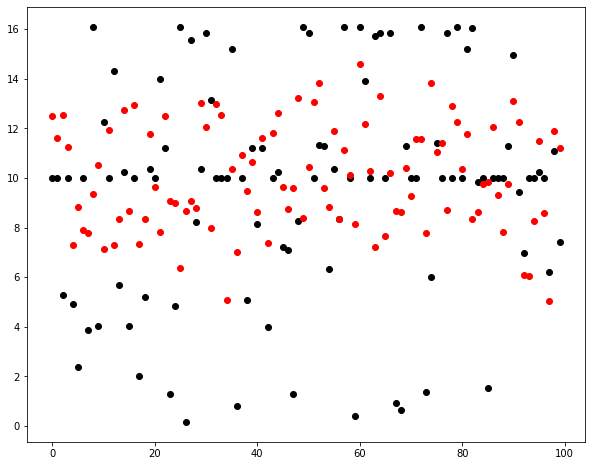

In [8]:
#patrzymy jak nasze wyniki różnią się od prawdzwiych - tutaj sample o rozmiarze 100 bo danych było tyle że nie zmieściły się na wykresie

y_sample = y.sample(n= 100)
y_hat = beta*X
y_hat = np.sum(y_hat, axis=1)
plt.figure(figsize=(10, 8))
plt.scatter(x=list(range(0, 100)), y= y_sample, color='black')         
plt.scatter(x=list(range(0, 100)), y=y_hat[y_sample.index], color='red')
plt.show()


<h1> Zadanie 4: Normal equation </h1>
Nie zawsze musimy liczyć funkcję straty i spadek gradient, czasami całkiem dobre parametry da nam <b> normal equation</b>, czyli bezpośredni wzór na betę:
<center><h2>

$ \beta = {(X^TX)}^{-1}(X^Ty)$

</h2></center>
Twoim zadaniem jest zaimplementowanie tego równania.

Więcej o normal equation: https://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression

In [9]:
### miejsce na twój kod
beta_normal = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))


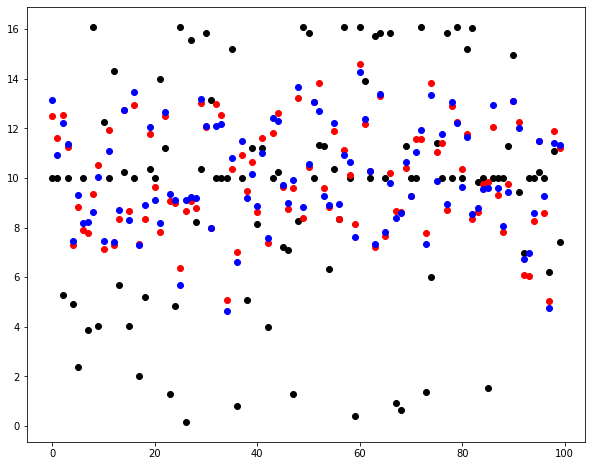

In [10]:
#porównanie jakie wyniki daje nam spadek gradientu (czerwony) a normal equation (niebieski)

y_hat = beta*X
y_hat2 = beta_normal*X
y_hat = np.sum(y_hat, axis=1)
y_hat2 = np.sum(y_hat2, axis=1)
plt.figure(figsize=(10, 8))
plt.scatter(x=list(range(0, 100)), y= y_sample, color='black')         
plt.scatter(x=list(range(0, 100)), y=y_hat[y_sample.index], color='red')
plt.scatter(x=list(range(0, 100)), y=y_hat2[y_sample.index], color='blue')
plt.show()
